# Intro to Scikit-Learn

Scikit-Learn is a Python library providing implementations of machine learning algorithms. The machine learning models are stored in Python classes. When we instantiate them, we pass in hyperparameters that define how the model should run. Then we fit the model to our training data using fit(). We can use the trained model to predict the output for new data with predict().

In [71]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## Regression Example

Create some dummy data - y values will roughly follow y = 2x - 1 line with some random noise built in.

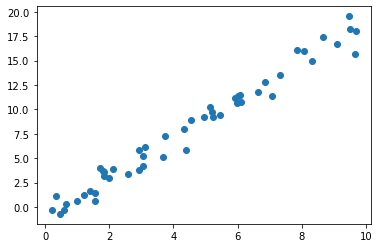

In [72]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Choose the model and set hyperparameters. We'll dig into what these are in the future.

In [73]:
model = LinearRegression(fit_intercept=True)

Scikit requires that the features matrix be a 2D array, so we need to reshape x. y is the target vector.

In [74]:
X = x[:, np.newaxis]

Now we can fit the model to our data and view the results. Note that all model parameters learned during fitting having trailing underscores.

In [75]:
model.fit(X, y)
model.coef_

array([1.9776566])

In [76]:
model.intercept_

-0.9033107255311164

## Classification Example

We'll use the Iris data set and a Gaussian naive Bayes model, which will be discussed in detail later. We'll a scikit-learn utility function to help us split the data into a training and a test set. You can get the iris dataset in many ways, but seaborn is used to make data manipulation easier.

In [77]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The petal and sepal measurements are the features, and the species column is the target vector. We need to separate these into different variables before generating train and test sets.

In [78]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

The train_test_split function randomly assigns rows to the train and test sets. Passing an integer to the random_state parameter makes the random assignment repeatable. It has a couple other parameters to control how the data is shuffled and split.

In [79]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

Now we follow the same process: Choose the model, instantiate with appropriate hyperparameters, train it on the train dataset, and then test it's ability to correctly predict output on the test dataset.

In [80]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)     
y_model = model.predict(Xtest) 

Scikit-Learn has another utility function to help us compare the model's output for the test dataset with the actual data.

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158